In [2]:
#산포도 그래프

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

#입력값 생성
np.random.seed(2)
x = np.arange(1,101)
y = 4*x*np.random.rand(100)

#산포도 그래프 그리기
flg = plt.figure()

ax = flg.add_subplot(111)
ax.scatter(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [7]:
#산포도 그래프 활용
import os
import pandas as pd

anime_master_csv = './anime/anime_master.csv'
df = pd.read_csv(anime_master_csv, index_col = 'anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


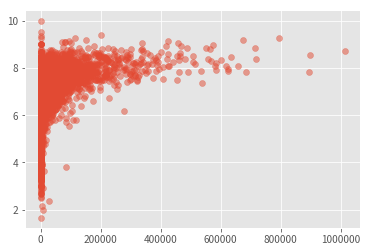

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df['members'], df['rating'], alpha=0.5)
plt.show()

In [9]:
#멤버수 증가에 따른 평점이 8 부근에 위치하는 현상.
#80만 이상 작품은?

#members 값으로 데이터 추리기
df.loc[df['members'] >= 800000, ['name', 'members']]

,name,members
anime_id,,
1535,Death Note,1013917
16498,Shingeki no Kyojin,896229
11757,Sword Art Online,893100


In [10]:
#복수의 조건

#members와 rating
df.loc[(df['members'] >= 600000) & (df['rating'] >=8.5), ['name', 'members','rating']]

,name,members,rating
anime_id,,,
5114,Fullmetal Alchemist: Brotherhood,793665,9.26
9253,Steins;Gate,673572,9.17
1575,Code Geass: Hangyaku no Lelouch,715151,8.83
1535,Death Note,1013917,8.71
16498,Shingeki no Kyojin,896229,8.54


In [11]:
#그룹화된 산포도
 # type 중복 없는 리스트를 만들기
types = df['type'].unique()
types

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

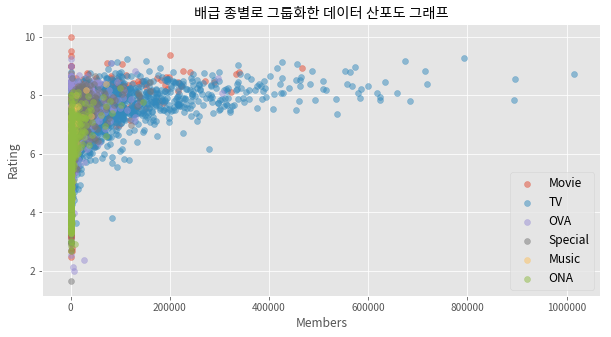

In [12]:

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

for t in types:
    x = df.loc[df['type'] == t, 'members']
    y = df.loc[df['type'] == t, 'rating']
    
    ax.scatter(x,y, alpha=0.5, label=t)
    
ax.set_title('배급 종별로 그룹화한 데이터 산포도 그래프')
ax.set_xlabel('Members')
ax.set_ylabel('Rating')

ax.legend(loc='lower right', fontsize=12)

plt.show()